# Problem Statement
Management of hyperglycemia in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. However, there are few national assessments of diabetes care during hospitalization which could serve as a baseline for change. This analysis of a large clinical database was undertaken to provide such an assessment and to find future directions which might lead to improvements in patient safety.  
  
Based on the given data, build a model to predict whether the patient is suffering from Diabetes or not? 


## Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
df = pd.read_csv("dataset_diabetes_diabetic_data.csv")

## Checking the data

In [3]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


## Dropping unwanted variables

In [4]:
df=df.drop(["patient_nbr"],axis=1) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      70180 non-null  object
 1   gender                    70180 non-null  object
 2   age                       70180 non-null  object
 3   admission_type_id         70180 non-null  int64 
 4   discharge_disposition_id  70180 non-null  int64 
 5   admission_source_id       70180 non-null  int64 
 6   time_in_hospital          70180 non-null  int64 
 7   num_lab_procedures        70180 non-null  int64 
 8   num_procedures            70180 non-null  int64 
 9   num_medications           70180 non-null  int64 
 10  number_outpatient         70180 non-null  int64 
 11  number_emergency          70180 non-null  int64 
 12  number_inpatient          70180 non-null  int64 
 13  diag_1                    70180 non-null  object
 14  diag_2                

diabatic is the target variable while all others are the predictors.  
  
Out of the 19 columns, 8 are object type, while remaining 11 are int.  
<b>Object</b> - race, gender, age, diag_1, diag_2, diag_3, change, diabatic  
<b>Int</b> -admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, number_diagnoses
  
Since label encoding is already present in the data, some of the nominal variables are displayed as int.  
Actual Nominal variables are 12:
race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, diag_1, diag_2, diag_3, number_diagnoses, change, diabatic.
  
Actual Numeric variables are 7:
time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient

  
It appears there are also no missing values.

## Check for missing value in any column

In [6]:
# Are there any missing values ?
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

## Summary of the data

In [7]:
df.describe(include="all")

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
count,70180,70180,70180,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.00000,70180,70180,70180,70180.000000,70180,70180
unique,6,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685,702,727,NaN,2,2
top,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,428,250,NaN,No,Yes
freq,51123,38061,18099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4939,4782,8332,NaN,43874,46777
mean,NaN,NaN,NaN,2.121730,3.981305,5.926404,4.439370,42.670020,1.350043,15.338772,0.294543,0.156312,0.60513,NaN,NaN,NaN,7.154104,NaN,NaN
std,NaN,NaN,NaN,1.532443,5.657360,4.424962,3.032789,19.197482,1.683676,8.071803,1.052725,0.722395,1.22914,NaN,NaN,NaN,1.992406,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,5.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.00000,NaN,NaN,NaN,8.000000,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,19.000000,0.000000,0.000000,1.00000,NaN,NaN,NaN,9.000000,NaN,NaN


In [8]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,Yes
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,Ch,Yes
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,No,Yes
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,Ch,Yes
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,Ch,Yes


In [9]:
#import pandas_profiling
#profile = df.profile_report(title='Report on patient data')
#profile.to_file(output_file="E2E Patient Data.html")

Some variables has invalid character "?"

## Geting unique counts of all Nominal Variables

In [10]:
for column in df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                   'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'change', 'diabatic']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

RACE :  6
Asian                373
Other                874
Hispanic            1341
?                   1461
AfricanAmerican    15008
Caucasian          51123
Name: race, dtype: int64


GENDER :  3
Unknown/Invalid        2
Male               32117
Female             38061
Name: gender, dtype: int64


AGE :  10
[0-10)        157
[10-20)       563
[20-30)      1178
[90-100)     1844
[30-40)      2779
[40-50)      6937
[80-90)     11261
[50-60)     12131
[60-70)     15231
[70-80)     18099
Name: age, dtype: int64


ADMISSION_TYPE_ID :  8
7        8
4        8
8      202
5     4133
6     4584
3    12171
2    13443
1    35631
Name: admission_type_id, dtype: int64


DISCHARGE_DISPOSITION_ID :  26
20        2
27        3
12        3
19        5
10        6
9         8
16       11
17       14
24       18
15       53
28       80
8       106
14      221
13      221
23      304
7       419
4       682
25      979
5      1031
22     1196
11     1255
2      1529
18     3677
6      8199
3      8666

race, diag1, diag2 and diag3 has ?

diag1, diag2, diag3 — are categorical and have a lot of values. We will remove these and use number_diagnoses to capture some of this information.

In [11]:
print('Before Removing: ',df.shape)
df=df.drop(["diag_1","diag_2","diag_3"],axis=1) 
print('After Removing: ',df.shape)

Before Removing:  (70180, 19)
After Removing:  (70180, 16)


This leaves us with 1461 values in race variable that has ?  
Since this is a categorical variable, we can either have these as a separate group, or we will remove them, since we still have sufficient data

In [12]:
print('Before: ',df.shape)
# Replace ? to Nan and remove all missing values
df.race = df.race.replace(to_replace = '?', value =np.nan)
df.dropna(inplace=True)
print('After: ',df.shape)

Before:  (70180, 16)
After:  (68719, 16)


## Check for duplicate data

In [13]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 22


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
4722,AfricanAmerican,Female,[10-20),1,1,7,3,51,0,3,0,0,0,1,No,Yes
17298,Caucasian,Female,[20-30),3,1,1,3,22,1,15,0,0,0,7,No,No
18111,Caucasian,Male,[70-80),1,18,7,2,40,0,9,0,0,0,6,Ch,Yes
23475,Caucasian,Male,[0-10),1,1,7,3,47,0,5,0,0,0,1,No,Yes
23932,AfricanAmerican,Female,[50-60),1,1,7,2,34,0,8,0,0,0,4,No,Yes
34892,AfricanAmerican,Female,[50-60),1,1,7,1,46,0,10,0,0,0,6,No,Yes
41130,Caucasian,Female,[50-60),1,1,7,1,41,0,8,0,0,0,5,Ch,Yes
44590,Caucasian,Male,[70-80),1,1,7,1,32,0,4,0,0,0,3,No,Yes
54543,Caucasian,Male,[80-90),1,1,7,2,57,0,11,0,0,0,9,Ch,Yes
56744,AfricanAmerican,Male,[70-80),1,1,7,4,45,0,15,0,0,0,9,Ch,Yes


## Removing Duplicates

In [14]:
df.drop_duplicates(inplace=True) 

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(68697, 16)


## Checking for Outliers

<AxesSubplot:>

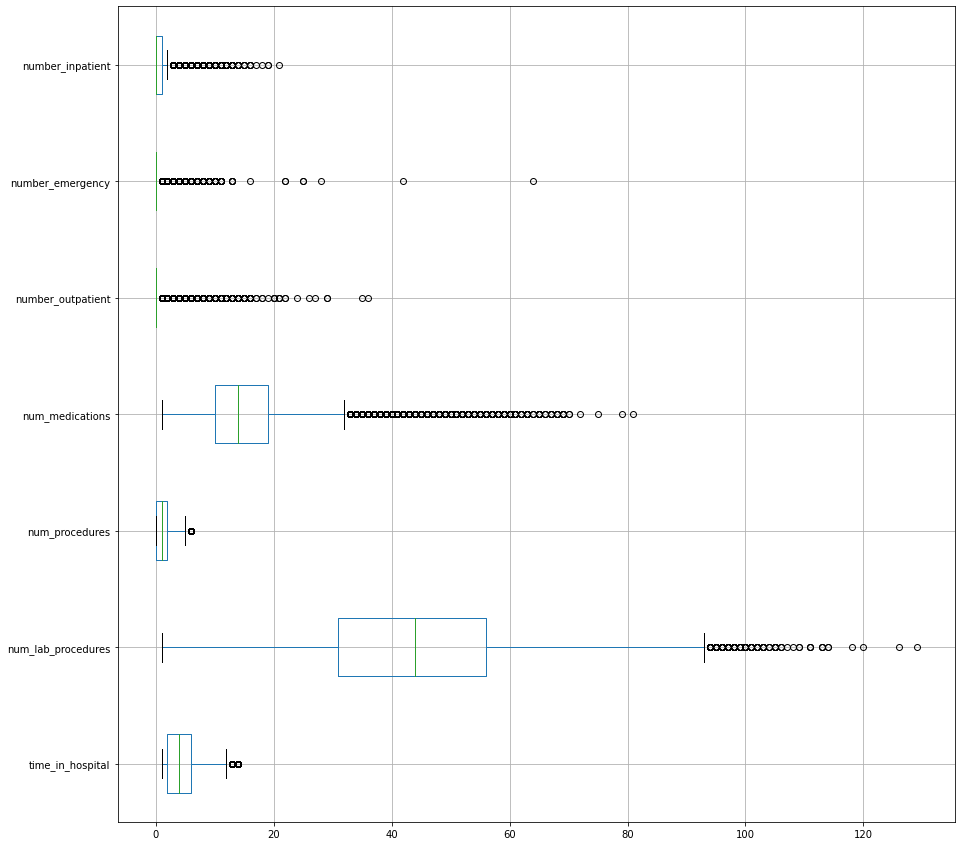

In [16]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']].boxplot(vert=0)

In [17]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [18]:
df_num = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']]

In [19]:
for i in df_num.columns:
    LL, UL = replace_outlier(df_num[i])
    df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])

<AxesSubplot:>

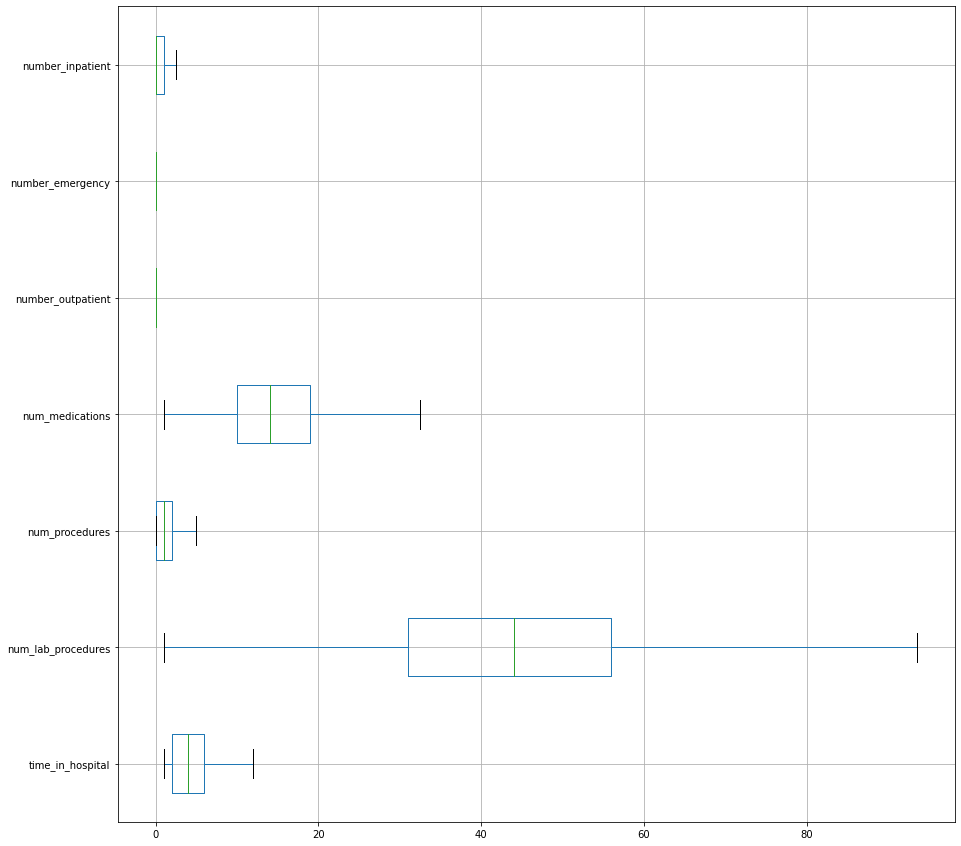

In [20]:
plt.figure(figsize=(15,15))
df_num.boxplot(vert=0)

## Checking pairwise distribution of the continuous variables

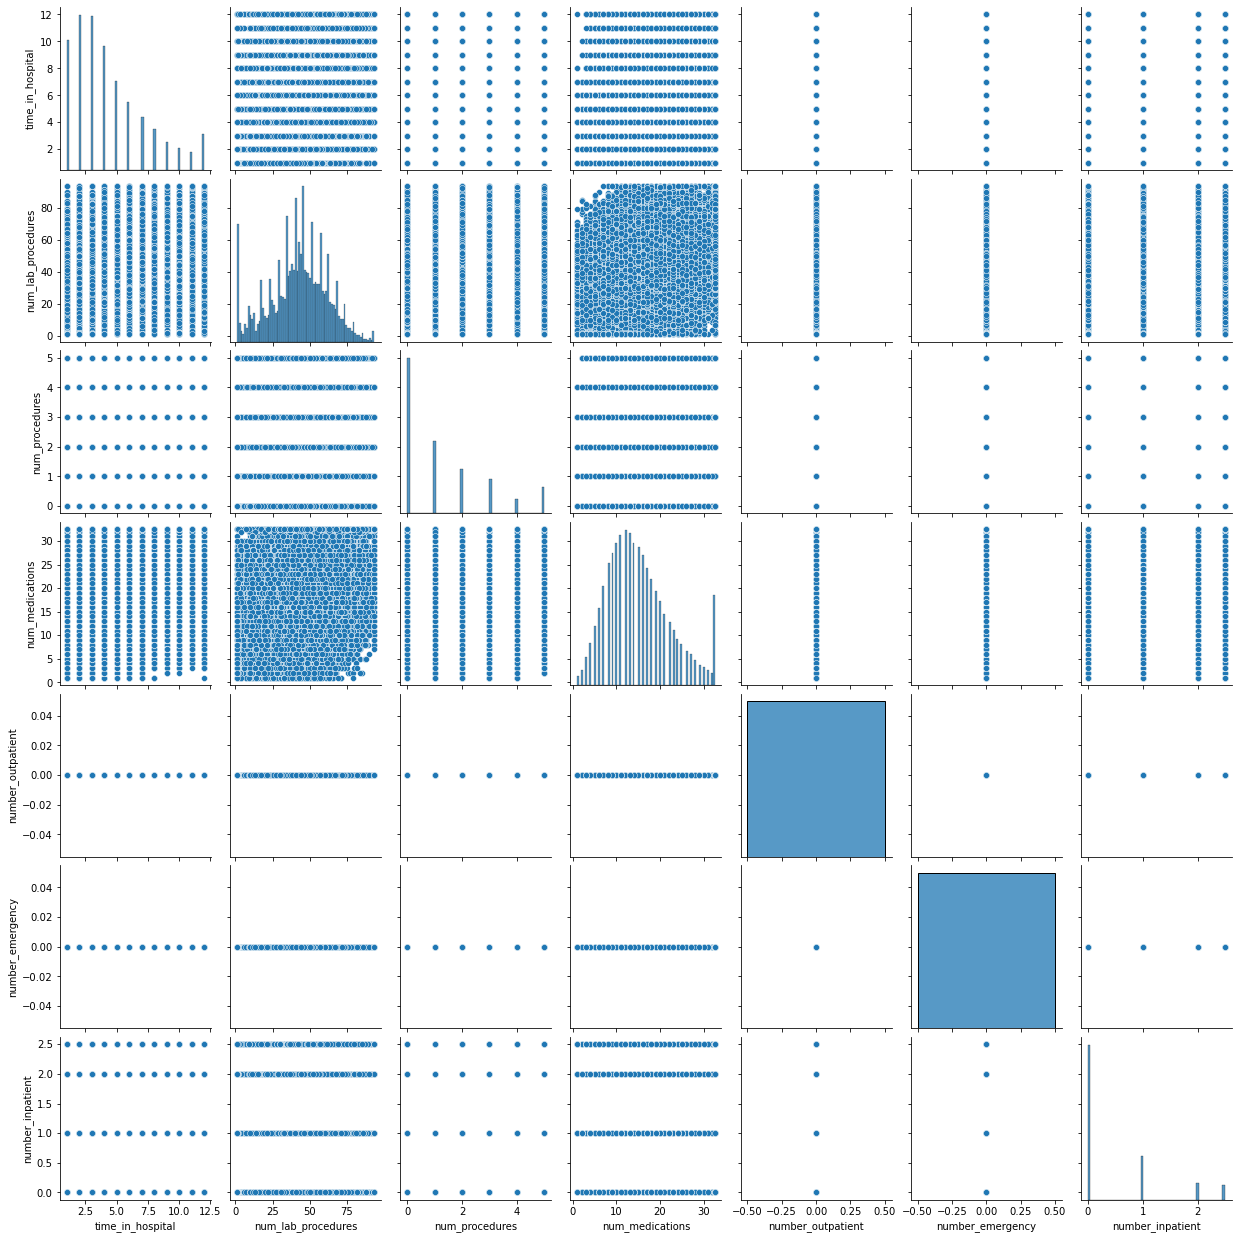

In [21]:
sns.pairplot(df_num)

## Checking for Correlations

<AxesSubplot:>

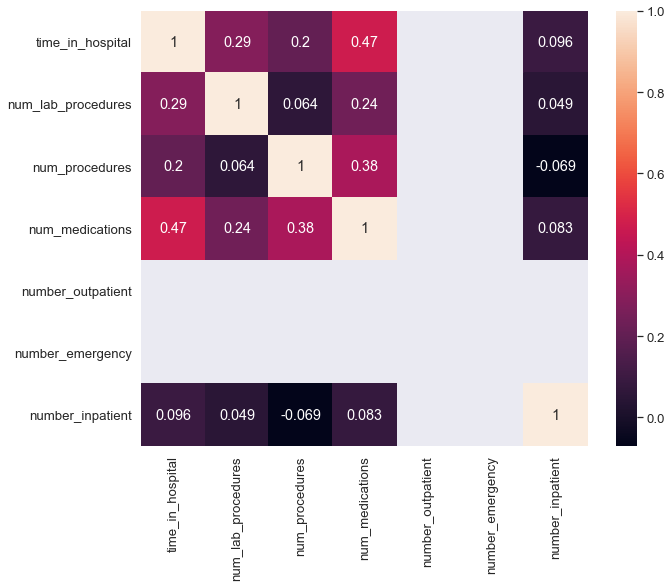

In [22]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_num.corr(), annot=True)

There are mostly positive correlations between variables, and very few negative correlations.  
Overall the magnitude of correlations between the variables are very less.

## Converting all objects to categorical codes

In [23]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: race
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
[2 0 4 1 3]


feature: gender
['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']
[0 1 2]


feature: age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']
[0 1 2 3 4 5 6 7 8 9]


feature: change
['No', 'Ch']
Categories (2, object): ['Ch', 'No']
[1 0]


feature: diabatic
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68697 entries, 0 to 70179
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      68697 non-null  int8 
 1   gender                    68697 non-null  int8 
 2   age                       68697 non-null  int8 
 3   admission_type_id         68697 non-null  int64
 4   discharge_disposition_id  68697 non-null  int64
 5   admission_source_id       68697 non-null  int64
 6   time_in_hospital          68697 non-null  int64
 7   num_lab_procedures        68697 non-null  int64
 8   num_procedures            68697 non-null  int64
 9   num_medications           68697 non-null  int64
 10  number_outpatient         68697 non-null  int64
 11  number_emergency          68697 non-null  int64
 12  number_inpatient          68697 non-null  int64
 13  number_diagnoses          68697 non-null  int64
 14  change                    68697 non-nu

In [25]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1


## Proportion of 1s and 0s

In [26]:
df.diabatic.value_counts(normalize=True)

1    0.665327
0    0.334673
Name: diabatic, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

## Extracting the target column into separate vectors for training set and test set

In [27]:
X = df.drop("diabatic", axis=1)

y = df["diabatic"]

X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0


## Splitting data into training and test set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1, stratify = y)

## Checking the dimensions of the training and test data

In [29]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (48087, 15)
X_test (20610, 15)
train_labels (48087,)
test_labels (20610,)


# Building a Decision Tree Classifier

In [30]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],# 5,7,9
    'min_samples_leaf': [50,100,150], # 1-3% 50-150
    'min_samples_split': [450,150,300] # 150 - 450
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [31]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=450)

## Generating Tree

In [32]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [33]:
# from sklearn.tree import export_graphviz
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus
# import graphviz


# dtc_new = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
# dtc_new.fit(X_train, train_labels)

# dot_data = StringIO()
# export_graphviz(dtc_new, out_file=dot_data, filled  = True, rounded = True, feature_names=X_train.columns)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())

http://webgraphviz.com/

## Variable Importance

In [34]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
change                    0.867765
num_medications           0.047959
number_diagnoses          0.027602
admission_source_id       0.011271
num_procedures            0.007852
admission_type_id         0.007575
age                       0.007273
discharge_disposition_id  0.004588
number_outpatient         0.004546
race                      0.003496
time_in_hospital          0.002909
number_inpatient          0.002590
num_lab_procedures        0.002241
gender                    0.001943
number_emergency          0.000390


## Predicting on Training and Test dataset

In [35]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [36]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000000,1.000000
1,0.391473,0.608527
2,0.546632,0.453368
3,0.523752,0.476248
4,0.000000,1.000000


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.843


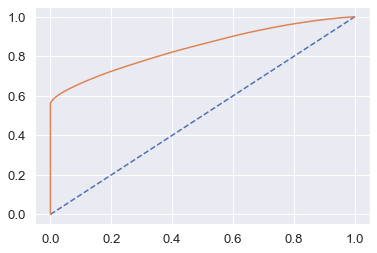

In [37]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.835


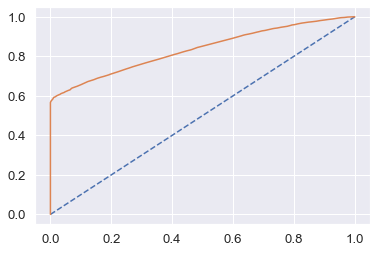

In [38]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [39]:
confusion_matrix(train_labels, ytrain_predict)

array([[11961,  4132],
       [ 7895, 24099]])

In [40]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7498908228835236

In [41]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.74      0.67     16093
           1       0.85      0.75      0.80     31994

    accuracy                           0.75     48087
   macro avg       0.73      0.75      0.73     48087
weighted avg       0.77      0.75      0.76     48087



In [42]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.85
cart_train_recall  0.75
cart_train_f1  0.8


### Confusion Matrix for test data

In [43]:
confusion_matrix(test_labels, ytest_predict)

array([[ 5036,  1862],
       [ 3473, 10239]])

In [44]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7411450752062105

In [45]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65      6898
           1       0.85      0.75      0.79     13712

    accuracy                           0.74     20610
   macro avg       0.72      0.74      0.72     20610
weighted avg       0.76      0.74      0.75     20610



In [46]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.85
cart_train_recall  0.75
cart_train_f1  0.79


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 84.7%        
    Accuracy: 75.5%        
    Sensitivity: 78%     
    Precision: 84%        
    f1-Score: 81%       
            
<b>Test Data:</b>      
    AUC: 83.5%      
    Accuracy:74.4%      
    Sensitivity: 77%    
    Precision: 83%       
    f1-Score: 80%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Change is the most important variable for predicting diabetes

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [47]:
param_grid = {
    'max_depth': [10],
    'max_features': [6],
    'min_samples_leaf': [10],
    'min_samples_split': [50],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [48]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [49]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [50]:
best_grid = grid_search.best_estimator_

In [51]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300)

## Predicting the Training and Testing data

In [52]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [53]:
confusion_matrix(train_labels,ytrain_predict)

array([[12630,  3463],
       [ 7387, 24607]])

In [54]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7743672926154678

In [55]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     16093
           1       0.88      0.77      0.82     31994

    accuracy                           0.77     48087
   macro avg       0.75      0.78      0.76     48087
weighted avg       0.79      0.77      0.78     48087



In [56]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.88
rf_train_recall  0.77
rf_train_f1  0.82


Area under Curve is 0.7769631157656514


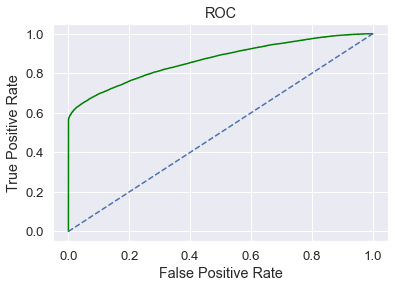

In [57]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [58]:
confusion_matrix(test_labels,ytest_predict)

array([[ 5202,  1696],
       [ 3431, 10281]])

In [59]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7512372634643377

In [60]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      6898
           1       0.86      0.75      0.80     13712

    accuracy                           0.75     20610
   macro avg       0.73      0.75      0.74     20610
weighted avg       0.77      0.75      0.76     20610



In [61]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.86
rf_test_recall  0.75
rf_test_f1  0.8


Area under Curve is 0.7519564229463971


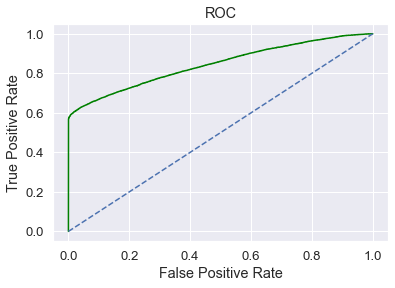

In [62]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [63]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
change                    0.784473
num_medications           0.069529
number_diagnoses          0.034051
num_lab_procedures        0.016303
age                       0.015408
admission_source_id       0.013908
time_in_hospital          0.011946
num_procedures            0.010791
admission_type_id         0.010401
discharge_disposition_id  0.008655
number_outpatient         0.008303
race                      0.006156
number_inpatient          0.004800
number_emergency          0.002919
gender                    0.002356


# Random Forest Conclusion

# Building a Neural Network Classifier

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [65]:
param_grid = {
    'hidden_layer_sizes': [100], #,50,200(200,200)
    'max_iter': [7000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [66]:
grid_search.fit(X_train_scaled, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [67]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=7000, tol=0.01)

## Predicting the Training and Testing data

In [68]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

## NN Model Performance Evaluation on Training data

In [69]:
confusion_matrix(train_labels,ytrain_predict)

array([[11423,  4670],
       [ 6948, 25046]])

In [70]:
nn_train_acc=best_grid.score(X_train_scaled,train_labels) 
nn_train_acc

0.758396240148065

In [71]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66     16093
           1       0.84      0.78      0.81     31994

    accuracy                           0.76     48087
   macro avg       0.73      0.75      0.74     48087
weighted avg       0.77      0.76      0.76     48087



In [72]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.84
nn_train_recall  0.78
nn_train_f1  0.81


Area under Curve is 0.5271204409439211


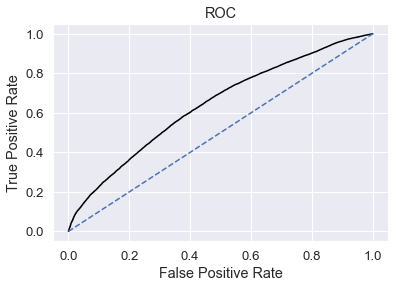

In [73]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [74]:
confusion_matrix(test_labels,ytest_predict)

array([[ 4830,  2068],
       [ 3147, 10565]])

In [75]:
nn_test_acc=best_grid.score(X_test_scaled,test_labels)
nn_test_acc

0.7469674915089762

In [76]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      6898
           1       0.84      0.77      0.80     13712

    accuracy                           0.75     20610
   macro avg       0.72      0.74      0.73     20610
weighted avg       0.76      0.75      0.75     20610



In [77]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.84
nn_test_recall  0.77
nn_test_f1  0.8


Area under Curve is 0.5225637946398818


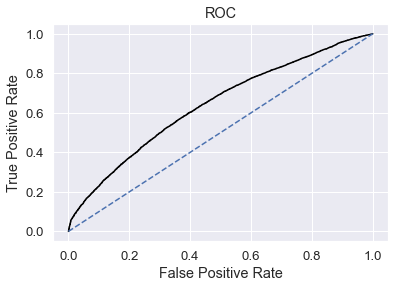

In [78]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [79]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=7000, tol=0.01)>

# Neural Network Conclusion

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [80]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.75,0.74,0.77,0.75,0.76,0.75
AUC,0.84,0.83,0.78,0.75,0.53,0.52
Recall,0.75,0.75,0.77,0.75,0.78,0.77
Precision,0.85,0.85,0.88,0.86,0.84,0.84
F1 Score,0.80,0.79,0.82,0.80,0.81,0.80


## ROC Curve for the 3 models on the Training data

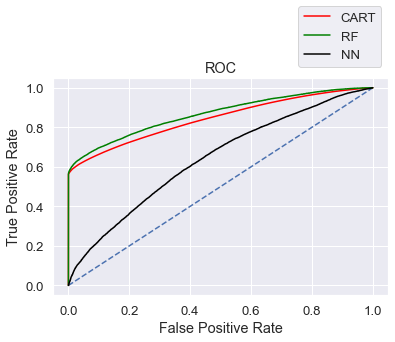

In [81]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

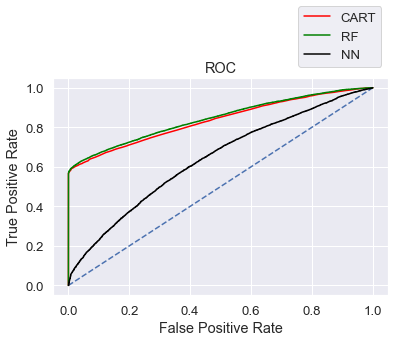

In [82]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')